## Introduction

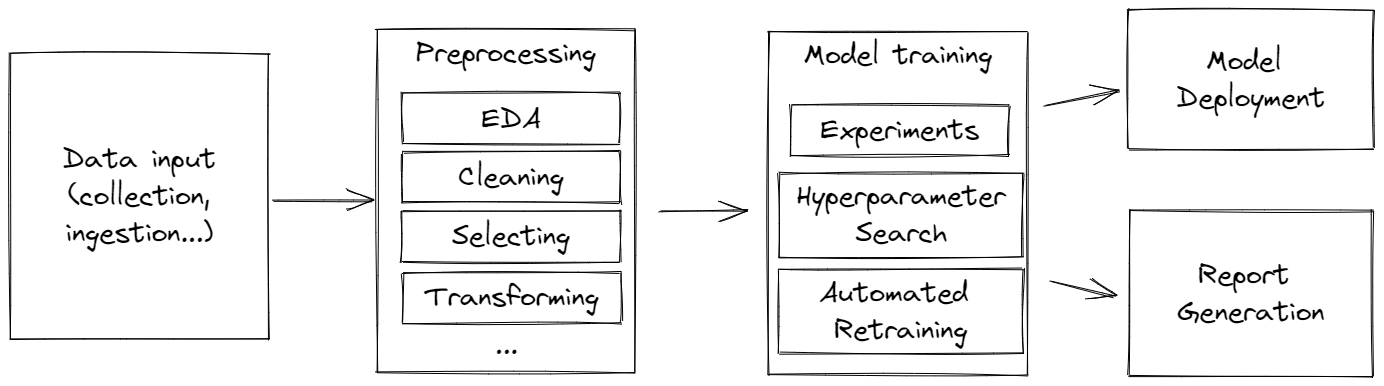

In [1]:
from IPython.display import Image
Image("DS_Pipeline.png")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

from sklearn import preprocessing
from collections import Counter

## Defining the problem - loading the data:

In [9]:
from pyspark.sql import SQLContext
from pyspark import SparkFiles
from pyspark import SparkContext

spark_context = SparkContext.getOrCreate()

spark_context.addFile("https://raw.githubusercontent.com/guru99-edu/R-Programming/master/adult_data.csv")
sql_context = SQLContext(spark_context)

spark_adult_df = sql_context.read.csv("adult.csv", header=True, inferSchema= True)

Py4JJavaError: An error occurred while calling o69.csv.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 3.0 failed 4 times, most recent failure: Lost task 0.3 in stage 3.0 (TID 12) (10.2.168.188 executor 0): java.io.FileNotFoundException: File file:/root/storage/datafabric/personal/rafael.borges/DataScienceDemos/BasicExample/adult.csv does not exist
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:124)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:169)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:93)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:345)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:898)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:898)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2258)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2207)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2206)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1079)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2445)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2387)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2376)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2196)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2217)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2236)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:472)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:425)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:47)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:3696)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:2722)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3687)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:103)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:90)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:775)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3685)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2722)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2929)
	at org.apache.spark.sql.execution.datasources.csv.TextInputCSVDataSource$.infer(CSVDataSource.scala:112)
	at org.apache.spark.sql.execution.datasources.csv.CSVDataSource.inferSchema(CSVDataSource.scala:65)
	at org.apache.spark.sql.execution.datasources.csv.CSVFileFormat.inferSchema(CSVFileFormat.scala:62)
	at org.apache.spark.sql.execution.datasources.DataSource.$anonfun$getOrInferFileFormatSchema$11(DataSource.scala:209)
	at scala.Option.orElse(Option.scala:447)
	at org.apache.spark.sql.execution.datasources.DataSource.getOrInferFileFormatSchema(DataSource.scala:206)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:419)
	at org.apache.spark.sql.DataFrameReader.loadV1Source(DataFrameReader.scala:325)
	at org.apache.spark.sql.DataFrameReader.$anonfun$load$3(DataFrameReader.scala:307)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:307)
	at org.apache.spark.sql.DataFrameReader.csv(DataFrameReader.scala:795)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:750)
Caused by: java.io.FileNotFoundException: File file:/root/storage/datafabric/personal/rafael.borges/DataScienceDemos/BasicExample/adult.csv does not exist
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:124)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:169)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:93)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:345)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:898)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:898)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)


In [10]:
SparkFiles.getRootDirectory()

'/tmp/spark-8764f228-88cb-41f6-8d6d-60b2e49b31c1/userFiles-f1178001-a4ed-49aa-b53d-2cf4029baf56'

## Problem description

In the beginning of a data analysis process, it is crucial to understand the problem that needs to be solved, identifying variables (columns), data types, inputs and outputs.

For this dataset, the goal is to learn whether a person's salary (output) is higher than $50K, relying only on other personal informations (inputs). As we have 2 possible values for output, this is considered a traditional 2-class classification problem. Our inputs are as follows:
* age (integer)
* workclass (categorical)
* fnlwgt (numeric)
* education (categorical)
* education-num (number of years of education - integer)
* marital-status (categorical)
* occupation (categorical)
* relationship (categorical)
* race (categorical)
* sex (categorical)
* capital-gain (numeric)
* capital-loss (numeric)
* hours-per-week (numeric)
* native-country (categorical)

The output is binary, as mentioned before:
* salary (binary: true if higher than $50K)



In [6]:
print(full_adult_df.dtypes)

numeric_inputs = ["age", "capital-gain", "capital-loss", "hours-per-week"]
categoric_inputs = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
outputs = ["salary"]

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object


## EDA (Exploratory Data Analysis)

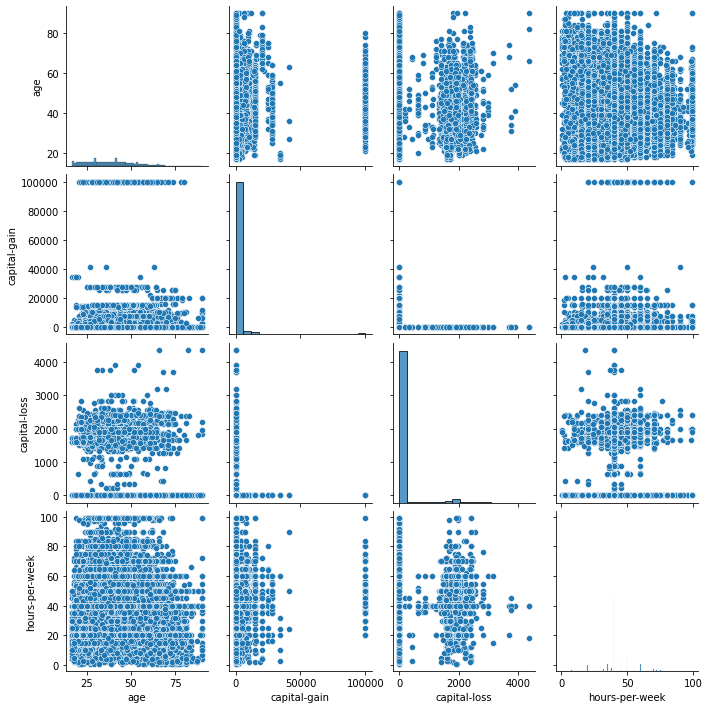

In [7]:
%matplotlib inline
seaborn.pairplot(full_adult_df[numeric_inputs])

[]

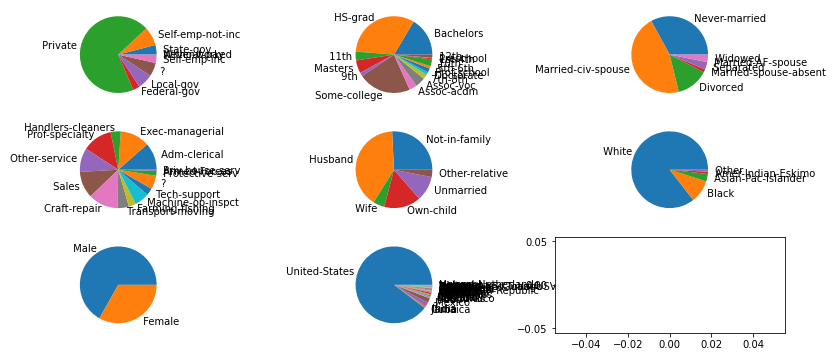

In [8]:
categoric_count = {}
for column in categoric_inputs:
    categoric_count[column] = Counter(full_adult_df[column])

fig, ax = plt.subplots(3, 3, figsize = (14, 6))

for i in range(0, len(categoric_inputs)):
    column = categoric_inputs[i]
    ax[int(i / 3)][i % 3].pie(categoric_count[column].values(), labels = categoric_count[column].keys())
    
plt.plot()


    





## Preprocessing

In [9]:
normalizer = preprocessing.MinMaxScaler() 
normalized_df = normalizer.fit_transform(full_adult_df[numeric_inputs])
normalized_df = pd.DataFrame(normalized_df)
print(normalized_df.head())
normalized_df.columns = numeric_inputs
print(normalized_df.head())

          0        1    2         3
0  0.301370  0.02174  0.0  0.397959
1  0.452055  0.00000  0.0  0.122449
2  0.287671  0.00000  0.0  0.397959
3  0.493151  0.00000  0.0  0.397959
4  0.150685  0.00000  0.0  0.397959
        age  capital-gain  capital-loss  hours-per-week
0  0.301370       0.02174           0.0        0.397959
1  0.452055       0.00000           0.0        0.122449
2  0.287671       0.00000           0.0        0.397959
3  0.493151       0.00000           0.0        0.397959
4  0.150685       0.00000           0.0        0.397959


In [10]:
label_encoder = preprocessing.LabelEncoder()
one_hot_encoder = preprocessing.OneHotEncoder(sparse = False)

full_processed_df = normalized_df.copy()

for column in categoric_inputs:
    values = sorted(categoric_count[column].keys())
    col_names = []
    for value in values:
        col_names.append(column + value)
    label_encoded_df = label_encoder.fit_transform(full_adult_df[column])
    one_hot_df = label_encoded_df.reshape(len(label_encoded_df), 1)
    one_hot_df = one_hot_encoder.fit_transform(one_hot_df)
    one_hot_df = pd.DataFrame(one_hot_df)
    one_hot_df.columns = col_names
    full_processed_df = full_processed_df.join(one_hot_df)
    


In [11]:
label_encoder = preprocessing.LabelEncoder()

output_df = label_encoder.fit_transform(full_adult_df["salary"])

## Splitting training and test

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(full_processed_df, full_adult_df["salary"], train_size = 0.80)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import scikitplot as skplt
import mlflow

experiment_name = "demo_adult"

experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment is None:
    experiment_id = mlflow.create_experiment(experiment_name)
else:
    experiment_id = experiment.experiment_id



## Training the models

### First attempt: KNN

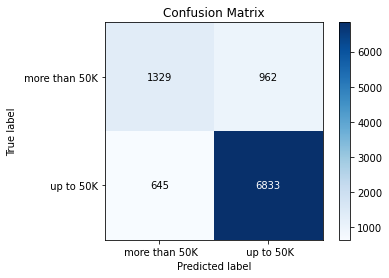

In [23]:
from sklearn.neighbors import KNeighborsClassifier
with mlflow.start_run(experiment_id = experiment_id):
    number_of_neighbours = 7
    knn_classifier = KNeighborsClassifier(number_of_neighbours)
    knn_classifier.fit(x_train, y_train)
    y_train_predict = knn_classifier.predict(x_train)
    y_predict = knn_classifier.predict(x_test)
    mlflow.log_param("Approach", "KNN")
    mlflow.log_param("Number of Neighbours", number_of_neighbours)
    mlflow.log_metric("Training accuracy", accuracy_score(y_train, y_train_predict))
    mlflow.log_metric("Accuracy", accuracy_score(y_test, y_predict))
    skplt.metrics.plot_confusion_matrix(y_test, y_predict)

In [ ]:
precision_recall_fscore_support(y_test, y_predict)

### Second attempt: Decision trees

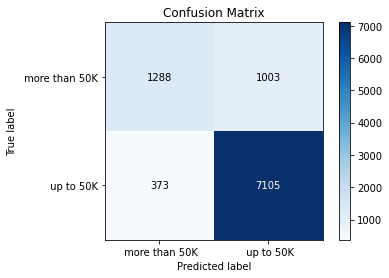

In [25]:
from sklearn.tree import DecisionTreeClassifier 
with mlflow.start_run(experiment_id = experiment_id):
    depth = 6
    dt_classifier = DecisionTreeClassifier(max_depth = depth) 
    
    dt_classifier.fit(x_train, y_train)
    y_train_predict = dt_classifier.predict(x_train)
    y_predict = dt_classifier.predict(x_test)
    mlflow.log_param("Approach", "Decision Tree")
    mlflow.log_param("Tree Height", depth)
    mlflow.log_metric("Training accuracy", accuracy_score(y_train, y_train_predict))
    mlflow.log_metric("Accuracy", accuracy_score(y_test, y_predict))
    skplt.metrics.plot_confusion_matrix(y_test, y_predict)


In [ ]:
precision_recall_fscore_support(y_test, y_predict)

### Third attempt: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(10) 
rf_classifier.fit(x_train, y_train)
y_predict = rf_classifier.predict(x_test)
skplt.metrics.plot_confusion_matrix(y_test, y_predict)
print(accuracy_score(y_test, y_predict))

In [ ]:
precision_recall_fscore_support(y_test, y_predict)

### Fourth attempt: Support Vector Machines

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)
y_predict = svm_classifier.predict(x_test)
print(accuracy_score(y_test, y_predict))